In [1]:
from Skipass.data import DataSkipass
from Skipass.utils.utils import draw_station
import pandas as pd
import numpy as np
import Skipass.params as params

In [2]:
objet = DataSkipass()

/home/romain/.pyenv/versions/3.8.6/envs/skipass/lib/python3.8/site-packages/Skipass/data.py:52: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  df_data = self.import_data()


In [3]:
lyon = [7481]

In [14]:
df1 = objet.filter_data()

In [5]:
df = objet.split_set()

In [15]:
df1

,date,numer_sta,Latitude,Longitude,Altitude,pmer,dd,ff,t,u,ssfrai,rr3,dd_sin,dd_cos
996380,2010-01-01 00:00:00,7577.0,44.581167,4.733000,73.0,99050.0,360.0,2.1,280.45,96.0,NaN,0.0,-2.449294e-16,1.000000
1197942,2010-01-01 00:00:00,7643.0,43.577000,3.963167,2.0,99010.0,290.0,1.5,282.95,98.0,NaN,0.0,-9.396926e-01,0.342020
1030075,2010-01-01 00:00:00,7591.0,44.565667,6.502333,871.0,NaN,100.0,1.0,275.65,92.0,NaN,0.0,9.848078e-01,-0.173648
1264879,2010-01-01 00:00:00,7661.0,43.079333,5.940833,115.0,99100.0,220.0,1.5,285.35,93.0,NaN,0.6,-6.427876e-01,-0.766044
861860,2010-01-01 00:00:00,7481.0,45.726500,5.077833,235.0,99080.0,0.0,0.0,280.65,88.0,0.0,0.0,0.000000e+00,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270234,2021-07-31 21:00:00,7661.0,43.079333,5.940833,115.0,NaN,320.0,8.6,NaN,NaN,NaN,NaN,-6.427876e-01,0.766044
1237090,2021-07-31 21:00:00,7650.0,43.437667,5.216000,9.0,100770.0,330.0,7.3,297.15,48.0,NaN,0.0,-5.000000e-01,0.866025
1203274,2021-07-31 21:00:00,7643.0,43.577000,3.963167,2.0,101090.0,300.0,6.2,292.95,65.0,NaN,0.2,-8.660254e-01,0.500000
1035430,2021-07-31 21:00:00,7591.0,44.565667,6.502333,871.0,NaN,170.0,0.9,287.55,99.0,NaN,47.2,1.736482e-01,-0.984808


In [17]:
Viz_Test = df1[df1.numer_sta.isin(lyon)][params.Col_improved]

In [18]:
merignac = [7510]
obs_test = int(params.obs_per_day * 30 * 6)

In [19]:
Viz_Test['date'] = pd.to_datetime(Viz_Test['date'],format='%Y%m%d%H%M%S',errors='coerce')
Viz_Test = Viz_Test.sort_values('date')
Viz_Test = Viz_Test.tail(obs_test)
Viz_Test.reset_index(inplace=True)

In [20]:
Viz_Test = Viz_Test.replace("mq",value=np.nan)
Viz_Test = Viz_Test.replace("/",value=np.nan)

In [21]:
for i in params.col_synop_float:
    Viz_Test[i] = Viz_Test[i].astype(float,errors='ignore')

In [22]:
Viz_Test = Viz_Test.drop(columns=['date','numer_sta'])

In [23]:
Viz_Test

,index,Latitude,Longitude,Altitude,pmer,dd,ff,t,u,ssfrai,rr3,dd_sin,dd_cos
0,856524,45.7265,5.077833,235.0,100900.0,180.0,2.3,282.35,98.0,0.0,1.6,1.224647e-16,-1.000000
1,856525,45.7265,5.077833,235.0,101000.0,150.0,3.7,281.95,98.0,0.0,0.8,5.000000e-01,-0.866025
2,856526,45.7265,5.077833,235.0,101010.0,140.0,4.5,281.95,95.0,0.0,0.2,6.427876e-01,-0.766044
3,856527,45.7265,5.077833,235.0,101100.0,150.0,4.0,282.65,93.0,0.0,0.6,5.000000e-01,-0.866025
4,856528,45.7265,5.077833,235.0,101080.0,160.0,4.1,284.85,87.0,0.0,0.2,3.420201e-01,-0.939693
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,867240,45.7265,5.077833,235.0,101340.0,330.0,3.1,293.95,65.0,0.0,0.0,-5.000000e-01,0.866025
1436,867241,45.7265,5.077833,235.0,101170.0,340.0,2.9,295.85,57.0,NaN,0.0,-3.420201e-01,0.939693
1437,867242,45.7265,5.077833,235.0,101100.0,340.0,6.5,296.35,53.0,0.0,0.0,-3.420201e-01,0.939693
1438,867243,45.7265,5.077833,235.0,101280.0,320.0,5.2,288.55,84.0,0.0,1.0,-6.427876e-01,0.766044


Figure(1800x864)


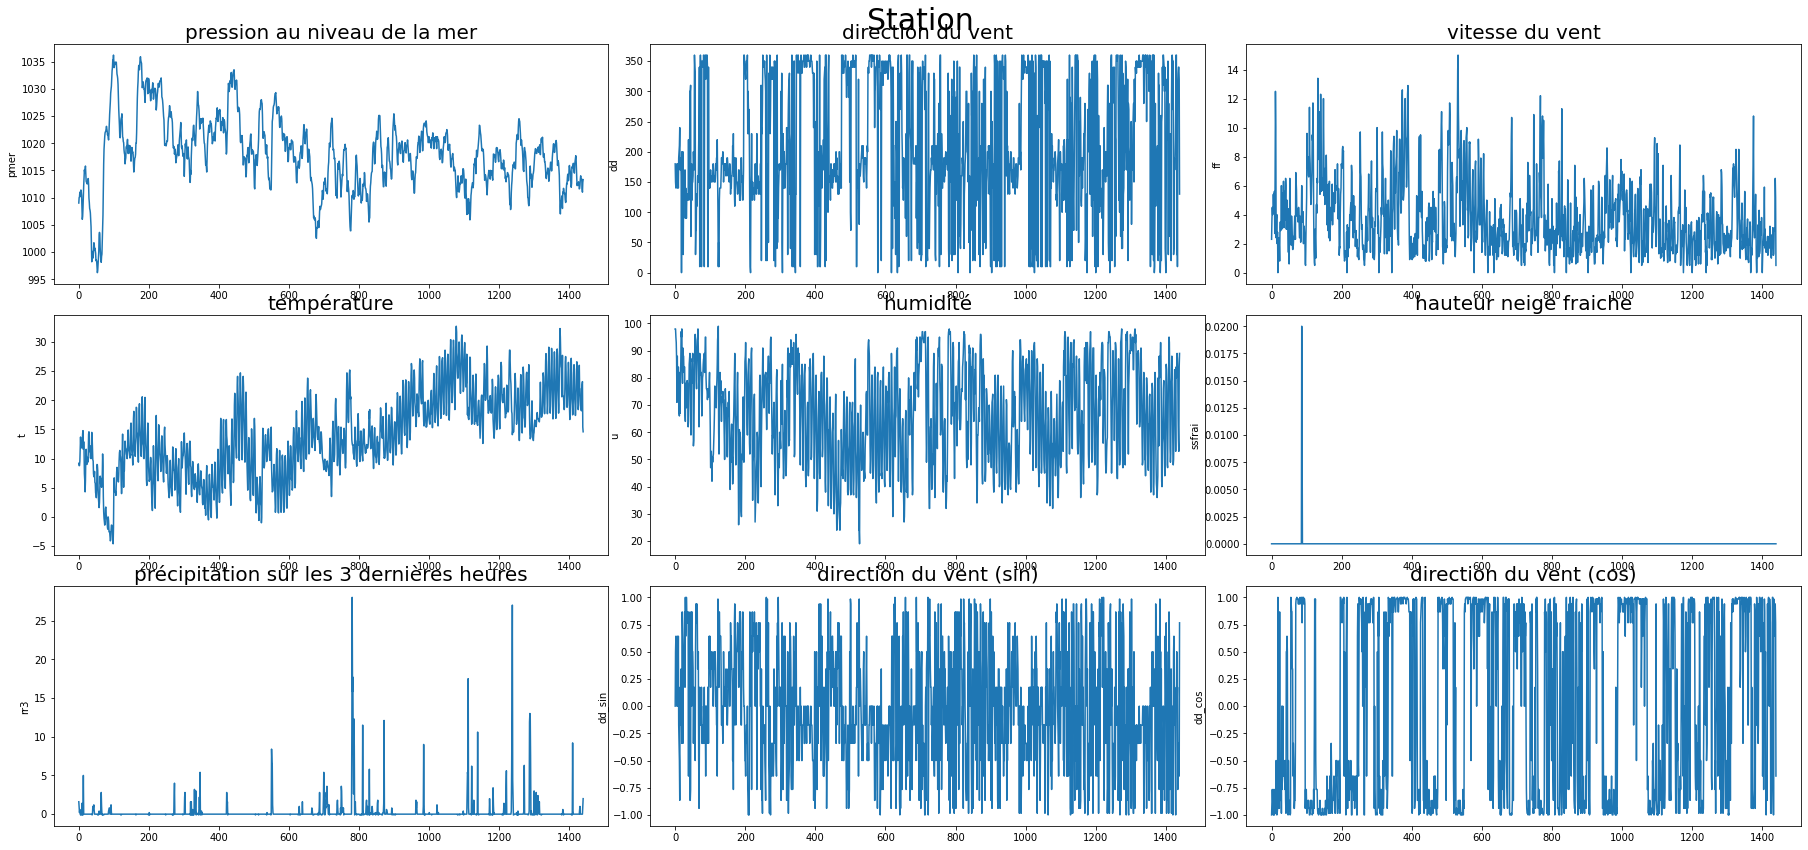

In [24]:
draw_station(Viz_Test)